## Hierarchical clustering 

### Hemant Thapa

Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. There are two types of hierarchical clustering; Agglomerative and Divisive.

Hierarchical clustering is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.

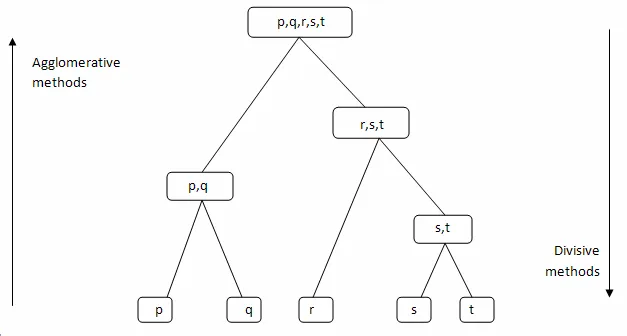

- Agglomerative is a bottom-up approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. 

- Divisive is a top-down approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.m

##### Imagine we have a small dataset consisting of the heights (in cm) of different individuals:

- Person A: 150 cm
- Person B: 155 cm
- Person C: 160 cm
- Person D: 175 cm
- Person E: 180 cm

Initial Step: Each person starts in their own cluster.

- Cluster 1: Person A
- Cluster 2: Person B
- Cluster 3: Person C
- Cluster 4: Person D
- Cluster 5: Person E

First Merge: The algorithm looks for the closest (most similar) pairs of clusters and merges them.

In this case, Persons A and B are closest.

- Cluster 1: Person A, Person B
- Cluster 2: Person C
- Cluster 3: Person D
- Cluster 4: Person E

Second Merge: Again, the closest clusters are merged. Suppose Persons C, D, and E are closer to each other than to A or B.

- Cluster 1: Person A, Person B
- Cluster 2: Person C, Person D, Person E

Final Merges: This process continues until all clusters are merged into one.

Cluster 1: Person A, Person B, Person C, Person D, Person E

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

let say, we have five person in our dataset, we have various height range between 150 to 180 cm.

In [2]:
#dictionary of individuals and their heights
heights_dict = {
    'Person A': 150,
    'Person B': 155,
    'Person C': 160,
    'Person D': 175,
    'Person E': 180
}

In [3]:
#printing the dictionary
for i, j in heights_dict.items():
    print(f"{i}: {j} cm")

Person A: 150 cm
Person B: 155 cm
Person C: 160 cm
Person D: 175 cm
Person E: 180 cm


In [4]:
#list from the dictionary values
heights_list = list(heights_dict.values())
print(heights_list)

[150, 155, 160, 175, 180]


Feature Selection 

In [5]:
#converting list into array
X = np.array(heights_list).reshape(-1, 1)

In [6]:
print(X)

[[150]
 [155]
 [160]
 [175]
 [180]]


In [7]:
#hierarchical clustering
Z = linkage(X, 'ward')

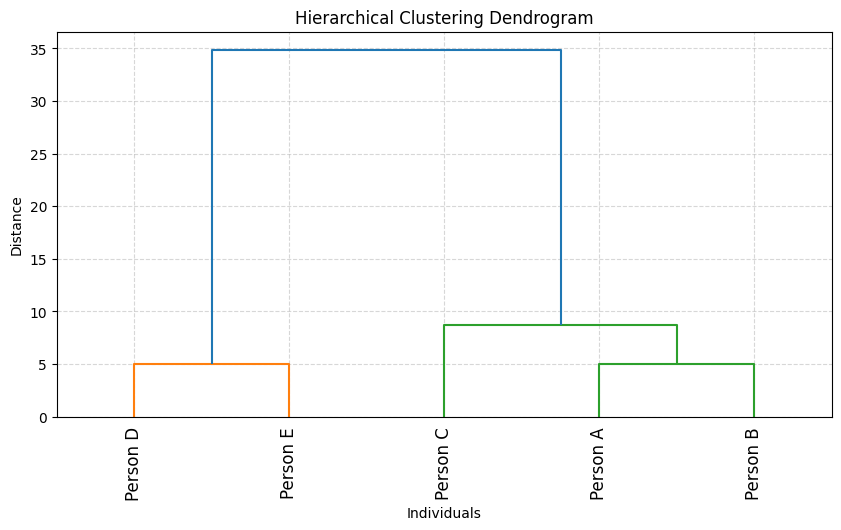

In [8]:
#plotting hierarchical clustering 
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Individuals')
plt.ylabel('Distance')
plt.grid(True, ls='--', alpha=0.5)
dendrogram(
    Z,
    labels=['Person A', 'Person B', 'Person C', 'Person D', 'Person E'],
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

In [9]:
#cophenetic Correlation Coefficient
c, _ = cophenet(Z, pdist(X))
print(f"Cophenetic Correlation Coefficient: {c}")

Cophenetic Correlation Coefficient: 0.8999706719632216


In [10]:
#silhouette Score
#let assume we cut the dendrogram at 2 clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 2, criterion='maxclust')

if len(np.unique(clusters)) > 1:
    s_score = silhouette_score(X, clusters)
else:
    s_score = "N/A (Only one cluster)"
print(f"Silhouette Score: {s_score}")

Silhouette Score: 0.7252958152958152


#### Cophenetic Correlation Coefficient (CPCC):

The Cophenetic Correlation Coefficient is a measure used to evaluate the quality of a hierarchical clustering algorithm by assessing how well it preserves the pairwise distances between data points. It quantifies the correlation between the original pairwise distances and the distances at which data points are merged in the hierarchical clustering. The CPCC values range between -1 and 1, with higher values indicating better preservation of distances.

**Formula:**

CPCC is calculated using the following formula:

$$CPCC = \frac{\sum_{ij}(D_{ij} - \bar{D})(cD_{ij} - \bar{cD})}{\sqrt{\sum_{ij}(D_{ij} - \bar{D})^2 \sum_{ij}(cD_{ij} - \bar{cD})^2}}$$

Where:
- $D_{ij}$ is the original pairwise distance between data points i and j.
- $cD_{ij}$ is the cophenetic distance (distance at which i and j are merged in the dendrogram).
- $\bar{D}$ is the mean of the original pairwise distances.
- $\bar{cD}$ is the mean of the cophenetic distances.

---

#### Silhouette Score:

The Silhouette Score is a metric used to evaluate the quality of clusters formed by various clustering algorithms. It measures how similar each data point within a cluster is to the other data points in the same cluster compared to the nearest neighboring cluster. The Silhouette Score values range from -1 to 1, with higher values indicating better cluster separation.

**Formula:**

The Silhouette Score for each data point i is calculated using the following formula:

$$S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Where:
- $S(i)$ is the Silhouette Score for data point i.
- $a(i)$ is the average distance from i to other data points in the same cluster (intra-cluster distance).
- $b(i)$ is the minimum average distance from i to data points in a different cluster (inter-cluster distance).

The overall Silhouette Score for the entire dataset is obtained by taking the mean of $S(i)$ for all data points.


Second example, lets take five random country. let say their GDP per capita, Life Expectancy and Literacy Rate.

In [11]:
#Economic and Health Indicators for different countries
data = {
    'Country': ['Country A', 'Country B', 'Country C', 'Country D', 'Country E'],
    'GDP_per_Capita': [40000, 50000, 30000, 70000, 60000],
    'Life_Expectancy': [80, 82, 75, 78, 81],
    'Literacy_Rate': [98, 85, 88, 90, 95]
}

In [12]:
#creating dataframe and print 
df = pd.DataFrame(data)
print(df)

     Country  GDP_per_Capita  Life_Expectancy  Literacy_Rate
0  Country A           40000               80             98
1  Country B           50000               82             85
2  Country C           30000               75             88
3  Country D           70000               78             90
4  Country E           60000               81             95


In [13]:
#standard scaler values for features 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['GDP_per_Capita', 'Life_Expectancy', 'Literacy_Rate']])

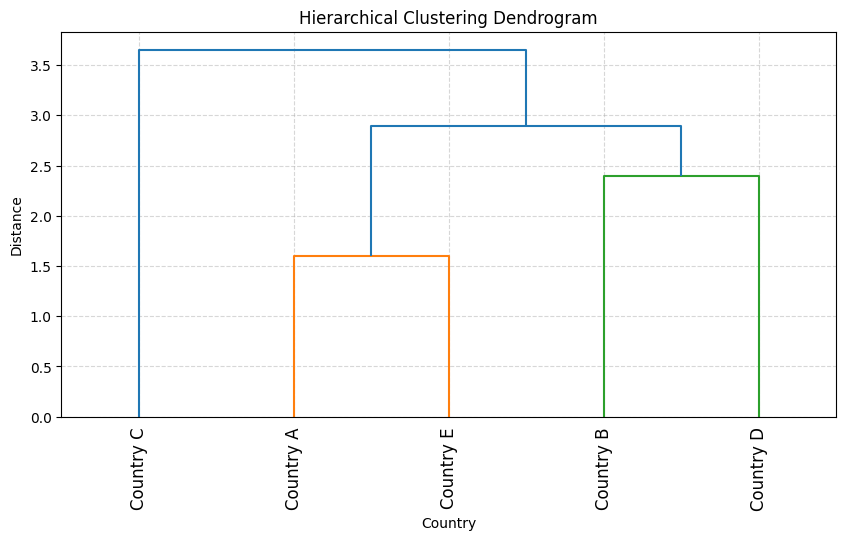

In [14]:
#hierarchical clustering
Z = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
dendrogram(Z, labels=df['Country'].tolist(), leaf_rotation=90, leaf_font_size=12)
plt.grid(True, ls='--', alpha=0.5)
plt.show()

In [15]:
#cophenetic Correlation Coefficient
c, _ = cophenet(Z, pdist(scaled_data))
print(f"Cophenetic Correlation Coefficient: {c}")

Cophenetic Correlation Coefficient: 0.8219338705121622


In [16]:
#silhouette Score
#we cut the dendrogram at 2 clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 2, criterion='maxclust')

if len(np.unique(clusters)) > 1:
    s_score = silhouette_score(scaled_data, clusters)
else:
    s_score = "N/A (Only one cluster)"
print(f"Silhouette Score: {s_score}")

Silhouette Score: 0.22216736232247505


### References

1. **Clustering in scikit-learn:**
   [Official scikit-learn Clustering Documentation](https://scikit-learn.org/stable/modules/clustering.html)

2. **Agglomerative Clustering in scikit-l :**
   [`sklearn.cluster.AgglomerativeClustering` Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering4html)

3. **Agglomerative Clustering Example in scikit-learn:**
   [Agglomerative Clustering Example: Ward Structured vs. Unstructured](https://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html)
